## 支持向量机（SVM）

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
sns.set()

###  支持向量机基本原理

 <img src='./images/3.png'>

如何将第一张图的数据点分开呢，试试映射到更高维吧。加一个Z维度
$Z = X^2 + Y^2$

### 例子

In [19]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

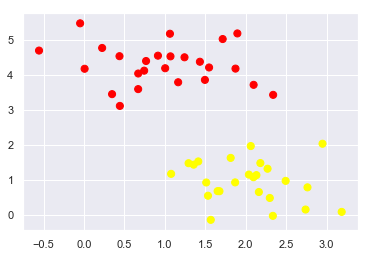

In [20]:
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='autumn')

随便画几条分割线

(-1, 3.5)

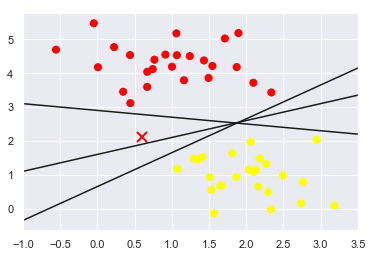

In [21]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

plt.plot([0.6],[2.1],'x',color = 'red', markeredgewidth=2, markersize=10)

for m, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit, m*xfit + b,'-k')
    
plt.xlim(-1,3.5)

### Support Vector Machines

(-1, 3.5)

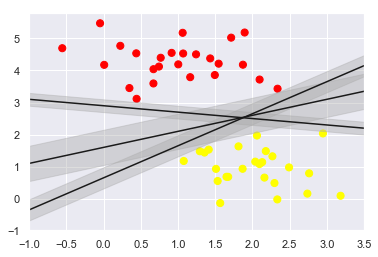

In [24]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33),(0.5, 1.6, 0.55),(-0.2, 2.9, 0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit,'-k')
    plt.fill_between(xfit, yfit -d, yfit+d, edgecolor='none',color='#AAAAAA', alpha=0.4)
plt.xlim(-1,3.5)

### 训练一个基本的SVM

In [25]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
def plot_svc_decision_function(model, ax=None,plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P, colors='k', levels=[-1,0,1], alpha=0.5,linestyles=['--','-','--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],s=300, linewidth=1, facecolor='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

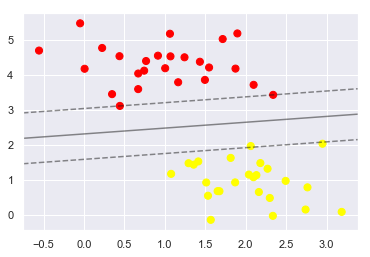

In [32]:
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [30]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

我们发现，svm算法中，只需要这些支持向量就可以拟合决策函数了，再加其他的数据也是没有用上的

### 引入核函数的SVM

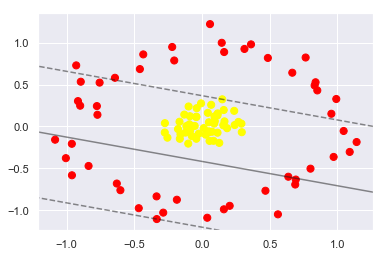

In [33]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0], X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)

以上证明 linear的核函数，对这类数据的分类效果很差，我们试试高斯核

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


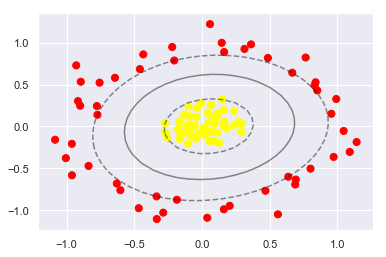

In [35]:
clf2 = SVC(kernel='rbf', C=1E6).fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf2)

可以看到，高斯核对这种数据的分类效果更加好

### SVM参数问题： Soft Margin问题
调节 C 参数：

- 当C趋近于无穷大的时候：意味着分类严格不能有错误
- 当C趋近于无穷小的时候：意味着可以有更大的错误容忍

调节 $\gamma$参数：

- 当$\gamma$越大：决策边界越复杂
- 当$\gamma$越小：决策边界越简单

## Example ：Face Recognition

In [36]:
from sklearn.datasets import fetch_lfw_people

In [ ]:
face = fetch_lfw_people(min_faces_per_person=60)
print(face.target_names)
print(face.images.shape)

In [ ]:
# 看一下照片
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

* 每个图的大小是 [62×47] 
* 在这里我们就把每一个像素点当成了一个特征，但是这样特征太多了，用PCA降维一下吧！

In [ ]:
# 制作一个pip_line
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
#划分数据集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=40)

In [ ]:
# 使用grid_search搜索
from sklearn.model.selection import GridSearchCV
param_grid = {'svc_C':[1,5,10], 'svc_gamma':[0.0001,0.0005,0.0001]}
grid = GridSarchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)
yfit.shape

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
# 查看结果
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

In [ ]:
# 使用混淆矩阵
from sklean.metrics import confision_matrix

mat = confusion_matrix(ytest, yfit)
sns.headmap(mat.T,square=True,annot=True,fmt='d',cbar=False, xticklabels=faces.target_names,yticklabels=faces.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

* 这样我们更能看出来，那些人比较容易弄混淆